In [2]:
import pennylane as qml 
import pennylane.numpy as np 
import matplotlib.pyplot as plt 

In [61]:
def QFT(n_wires, semi_classical=False):

    if semi_classical:
        mid_measures = []
        for n in range( n_wires ):
            qml.Hadamard( wires=n )
            if n < n_wires-1:
                mid_measure = qml.measure( wires=n ) 
                mid_measures.append( mid_measure )
                for m in range(1,n_wires-n):
                    qml.cond( mid_measure, 
                                qml.RZ )( np.pi/2**m, 
                                            wires=n+m ) 

    else:
        for n in range( n_wires  ):
            qml.Hadamard(wires=n)
            for m in range(1,n_wires-n):
                qml.CRZ( np.pi/2**m, wires=[n,n+m]  )



In [62]:
n_wires = 3
dev = qml.device("default.qubit", wires=n_wires, shots=10000 )

@qml.qnode(dev)
def circuit( n_wires, semi_classical=False ):
    
    qml.Hadamard(0)
    for n in range(n_wires-1):
        qml.CNOT( [n, n+1] )

    QFT( n_wires, semi_classical )

    return qml.probs( wires=range(n_wires) )

(<Figure size 900x400 with 1 Axes>, <Axes: >)

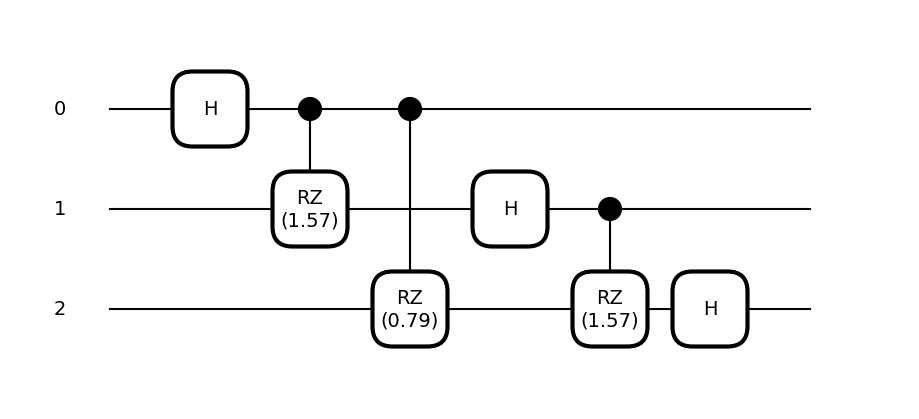

In [63]:
qml.draw_mpl( QFT, decimals=2 )(n_wires)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

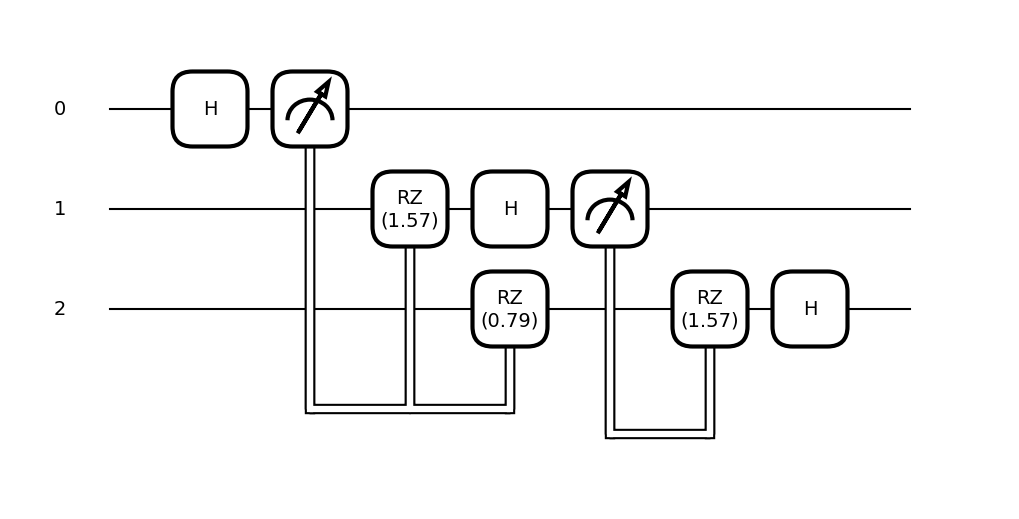

In [5]:
qml.draw_mpl( QFT, decimals=2 )( n_wires, True )

In [28]:
def classical_swaps( probs, n_wires ):
    return probs.reshape(n_wires*[2]).transpose(np.arange(n_wires)[::-1]).reshape(2**n_wires)


In [29]:
classical_swaps( circuit(n_wires), n_wires )

array([0.2474, 0.2184, 0.1211, 0.0379, 0.    , 0.04  , 0.1202, 0.215 ])

In [30]:
classical_swaps( circuit(n_wires, True ), n_wires )

tensor([0.2474, 0.2104, 0.1246, 0.0379, 0.    , 0.0402, 0.1264, 0.2131], requires_grad=True)

In [31]:
dev2 = qml.device("default.qubit", wires=n_wires, shots=10000 )
@qml.qnode(dev2)
def circuit2( n_wires):
    
    qml.Hadamard(0)
    for n in range(n_wires-1):
        qml.CNOT( [n, n+1] )

    qml.QFT( range(n_wires) )

    return qml.probs( wires=range(n_wires) )

In [32]:
circuit2( n_wires )

tensor([0.2464, 0.2083, 0.1287, 0.0364, 0.    , 0.0374, 0.1286, 0.2142], requires_grad=True)